# Packages

#### - python = 3.6.2
#### - pynwb = 1.0.1
#### - hdmf = 1.0.1
#### - neo = 0.8.0.dev
#### - allensdk = 1.0.0.dev7

In [1]:
import pynwb
from pynwb import *
import numpy as np
from datetime import datetime

In [2]:
###################
# Write an NWBFile
###################

session_description='session description', 
identifier = 'identifier'
session_start_time = datetime(2019, 10, 17, 11, 35)
print("session_start_time = ", session_start_time)
create_date = datetime.now()
print("create_date = ", create_date)

nwbfile2 = NWBFile('session_description', 
                   'identifier', 
                   session_start_time, 
                   file_create_date=create_date,
                   timestamps_reference_time=None,
                   experimenter="Experimenter", 
                   experiment_description="Experimenter description", 
                   session_id="session id", 
                   institution=None, 
                   keywords=None, 
                   notes=None, 
                   pharmacology=None, 
                   protocol=None, 
                   related_publications=None, 
                   slices=None, 
                   source_script=None, 
                   source_script_file_name=None, 
                   data_collection=None, 
                   surgery=None, 
                   virus=None, 
                   stimulus_notes=None, 
                   lab="Laboratory", 
                   acquisition=None, 
                   stimulus=None, 
                   stimulus_template=None, 
                   epochs=None, 
                   epoch_tags=set(), 
                   trials=None, 
                   invalid_times=None, 
                   time_intervals=None,
                   units=None, 
                   modules=None, 
                   electrodes=None, 
                   electrode_groups=None, 
                   ic_electrodes=None, 
                   sweep_table=None, 
                   imaging_planes=None, 
                   ogen_sites=None, 
                   devices=None, 
                   subject=None)
print("nwbfile2 = ", nwbfile2)

session_start_time =  2019-10-17 11:35:00
create_date =  2019-10-16 15:34:04.654899
nwbfile2 =  
root <class 'pynwb.file.NWBFile'>
Fields:
  acquisition: { }
  analysis: { }
  devices: { }
  electrode_groups: { }
  epoch_tags: {}
  experiment_description: Experimenter description
  experimenter: Experimenter
  ic_electrodes: { }
  imaging_planes: { }
  lab: Laboratory
  lab_meta_data: { }
  modules: { }
  ogen_sites: { }
  session_id: session id
  stimulus: { }
  stimulus_template: { }
  time_intervals: { }



/home/elodie/miniconda2/envs/env_NWB_py3/lib/python3.6/site-packages/pynwb/file.py:619: UserWarning: Date is missing timezone information. Updating to local timezone.
  warn("Date is missing timezone information. Updating to local timezone.")


# Timeseries

### TimeSeries objects store time series data.

In [3]:
data = np.arange(10)

ts = TimeSeries(name='name of the timeseries', 
                data=data, 
                resolution=3.0, 
                rate=10.0, 
                unit='unit of timeseries')
print("ts = ", ts)

# Add to acquisition
nwbfile2.add_acquisition(ts)

ts =  
name of the timeseries <class 'pynwb.base.TimeSeries'>
Fields:
  comments: no comments
  conversion: 1.0
  data: [0 1 2 3 4 5 6 7 8 9]
  description: no description
  num_samples: 10
  rate: 10.0
  resolution: 3.0
  starting_time: 0.0
  unit: unit of timeseries



In [4]:
######################
# Electrode metadata
######################
# Extracellular electrophysiology data
#######################################

device = nwbfile2.create_device(name='trodes_rig123')
print("device = ", device)

electrode_name = 'tetrode1'
description = "an example tetrode"
location = "somewhere in the hippocampus"

# Electrode group
electrode_group = nwbfile2.create_electrode_group(electrode_name,
                                                 description=description,
                                                 location=location,
                                                 device=device)
print("electrode_group = ", electrode_group)

for idx in [1, 2, 3, 4]:
    nwbfile2.add_electrode(idx,
                          x=1.0, y=2.0, z=3.0,
                          imp=float(-idx),
                          location='CA1', filtering='none',
                          group=electrode_group)

# Electrode table region
electrode_table_region = nwbfile2.create_electrode_table_region([0, 2], 'the 1st and 3rd electrodes')
print("electrode_table_region = ", electrode_table_region)

device =  
trodes_rig123 <class 'pynwb.device.Device'>
Fields:

electrode_group =  
tetrode1 <class 'pynwb.ecephys.ElectrodeGroup'>
Fields:
  description: an example tetrode
  device: trodes_rig123 <class 'pynwb.device.Device'>
  location: somewhere in the hippocampus

electrode_table_region =  
electrodes <class 'pynwb.core.DynamicTableRegion'>
Fields:
  description: the 1st and 3rd electrodes
  table: electrodes <class 'pynwb.core.DynamicTable'>



In [5]:
###########################
# Extracellular recordings
# ElectricalSeries 
# SpikeEventSeries
###########################

from pynwb.ecephys import ElectricalSeries
from pynwb.ecephys import SpikeEventSeries
from pynwb.behavior import SpatialSeries

###################
# ElectricalSeries
###################

data_len = 10    
ephys_data = np.random.rand(data_len)
rate = 20.0
timestamps = np.arange(10)
ephys_timestamps = np.arange(data_len) / rate

ephys_ts = ElectricalSeries(
                            name = 'test_ephys_data',
                            data = ephys_data,
                            electrodes = electrode_table_region,
                            timestamps=timestamps,
                           )
print("ephys_ts = ", ephys_ts)
nwbfile2.add_acquisition(ephys_ts) 

ephys_ts =  
test_ephys_data <class 'pynwb.ecephys.ElectricalSeries'>
Fields:
  comments: no comments
  conversion: 1.0
  data: [0.72237522 0.72950587 0.30729543 0.32785952 0.42564171 0.83648301
 0.7809395  0.28081532 0.96885916 0.69898951]
  description: no description
  electrodes: electrodes <class 'pynwb.core.DynamicTableRegion'>
  interval: 1
  num_samples: 10
  resolution: 0.0
  timestamps: [0 1 2 3 4 5 6 7 8 9]
  timestamps_unit: Seconds
  unit: volt



In [6]:
######################
# Intracellular electrophysiology data
#######################################

ic_elec = nwbfile2.create_ic_electrode(name="ic_elec0",
                                   description='a mock intracellular electrode',
                                   device=device)
print("ic_elec = ", ic_elec)

ic_elec =  
ic_elec0 <class 'pynwb.icephys.IntracellularElectrode'>
Fields:
  description: a mock intracellular electrode
  device: trodes_rig123 <class 'pynwb.device.Device'>



In [7]:
# Intracellular electrophysiology data
#######################################
# Stimulus data
######################
# Current clamp
######################

from pynwb.icephys import CurrentClampStimulusSeries

ccss = CurrentClampStimulusSeries(name="ccss", data=[1, 2, 3, 4, 5], unit='A',
                                starting_time=123.6, rate=10e3, 
                                electrode=ic_elec, gain=0.02, sweep_number=15)
print("ccss = ", ccss)
nwbfile2.add_acquisition(ccss)

ccss =  
ccss <class 'pynwb.icephys.CurrentClampStimulusSeries'>
Fields:
  comments: no comments
  conversion: 1.0
  data: [1 2 3 4 5]
  description: no description
  electrode: ic_elec0 <class 'pynwb.icephys.IntracellularElectrode'>
  gain: 0.02
  num_samples: 5
  rate: 10000.0
  resolution: 0.0
  starting_time: 123.6
  starting_time_unit: Seconds
  stimulus_description: NA
  sweep_number: 15
  unit: A



In [8]:
##################
# Creating Epochs
##################

epoch_tags = ('example_epoch',)
ep = nwbfile2.add_epoch(timeseries=[ts],
                         tags=epoch_tags,
                         start_time=0.0,
                         stop_time=10.0,                
                         )

In [9]:
# Filename
filename = "/home/elodie/NWB_Files/NWB_File_python_3_pynwb_101_Team_Meeting.nwb"
io2 = pynwb.NWBHDF5IO(filename, manager=get_manager(), mode='w')
print("io2 = ", io2)

io2 =  <pynwb.NWBHDF5IO object at 0x7fcfa678c080>


In [10]:
io2.write(nwbfile2)
io2.close()

In [11]:
# Plotting settings
show_bar_plot = False    # Change setting to plot distribution of object sizes in the HDF5 file
plot_single_file = True # Plot all files or a single example file

from utils.render import HierarchyDescription, NXGraphHierarchyDescription
import matplotlib.pyplot as plt

file_hierarchy = HierarchyDescription.from_hdf5(filename)
file_graph = NXGraphHierarchyDescription(file_hierarchy)
fig = file_graph.draw(show_plot=False,
                      figsize=(12,16),
                      label_offset=(0.0, 0.0065),
                      label_font_size=10)
print("fig = ", fig)
plot_title = filename + " \n " + "#Datasets=%i, #Attributes=%i, #Groups=%i, #Links=%i" % (len(file_hierarchy['datasets']), len(file_hierarchy['attributes']), len(file_hierarchy['groups']), len(file_hierarchy['links']))
plt.title(plot_title)
plt.show()

fig =  Figure(1200x1600)


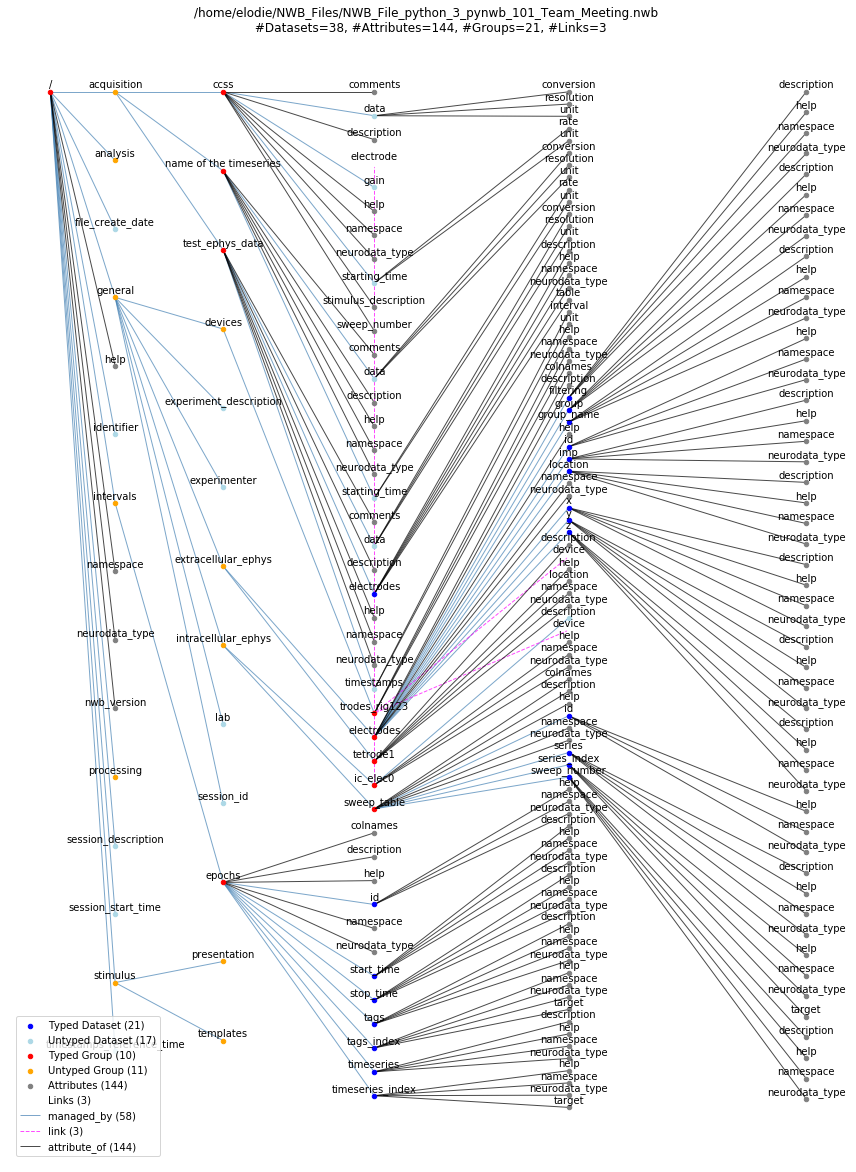

In [12]:
fig = file_graph.draw(
                      show_plot=False,
                      figsize=(12,16),
                      label_offset=(0.0, 0.0065),
                      label_font_size=10
                     )

plot_title = filename + " \n " + "#Datasets=%i, #Attributes=%i, #Groups=%i, #Links=%i" % (len(file_hierarchy['datasets']), len(file_hierarchy['attributes']), len(file_hierarchy['groups']), len(file_hierarchy['links']))
plt.title(plot_title)
plt.show()

In [13]:
io2 = pynwb.NWBHDF5IO(filename, mode='r')
print("io2 = ", io2)
builder = io2.read_builder()
print("builder = ", builder)

io2 =  <pynwb.NWBHDF5IO object at 0x7fcfa65a4518>
builder =  {'attributes': {'help': 'an NWB:N file for storing cellular-based neurophysiology data', 'namespace': 'core', 'neurodata_type': 'NWBFile', 'nwb_version': '2.0b'}, 'groups': {'acquisition': {'attributes': {}, 'groups': {'ccss': {'attributes': {'comments': 'no comments', 'description': 'no description', 'help': 'Stimulus current applied during current clamp recording', 'namespace': 'core', 'neurodata_type': 'CurrentClampStimulusSeries', 'stimulus_description': 'NA', 'sweep_number': 15}, 'groups': {}, 'datasets': {'data': {'attributes': {'conversion': 1.0, 'resolution': 0.0, 'unit': 'A'}, 'data': <HDF5 dataset "data": shape (5,), type "<i8">}, 'gain': {'attributes': {}, 'data': 0.02}, 'starting_time': {'attributes': {'rate': 10000.0, 'unit': 'Seconds'}, 'data': 123.6}}, 'links': {'electrode': {'builder': {'attributes': {'help': 'Metadata about an intracellular electrode', 'namespace': 'core', 'neurodata_type': 'IntracellularElec

In [14]:
filename_neo = "/home/elodie/env_NWB_py3/my_notebook/my_first_test_neo_to_nwb_2.nwb"
io_neo = pynwb.NWBHDF5IO(filename_neo, mode='r')
print("io_neo = ", io_neo)

io_neo =  <pynwb.NWBHDF5IO object at 0x7fcfa65a44e0>


In [15]:
io_neo.read_builder()

{'acquisition': {},
 'analysis': {},
 'general': {},
 'intervals': {'epochs': {'id': {'attributes': {'help': 'unique identifiers for a list of elements',
     'namespace': 'core',
     'neurodata_type': 'ElementIdentifiers'},
    'data': <HDF5 dataset "id": shape (3,), type "<i8">},
   'start_time': {'attributes': {'description': 'Start time of epoch, in seconds',
     'help': 'Values for a list of elements',
     'namespace': 'core',
     'neurodata_type': 'VectorData'},
    'data': <HDF5 dataset "start_time": shape (3,), type "<f8">},
   'stop_time': {'attributes': {'description': 'Stop time of epoch, in seconds',
     'help': 'Values for a list of elements',
     'namespace': 'core',
     'neurodata_type': 'VectorData'},
    'data': <HDF5 dataset "stop_time": shape (3,), type "<f8">},
   'colnames': array([b'start_time', b'stop_time'], dtype='|S13'),
   'description': 'experimental epochs',
   'help': 'A general epoch object',
   'namespace': 'core',
   'neurodata_type': 'TimeInterv

In [16]:
io_neo.read()


root <class 'pynwb.file.NWBFile'>
Fields:
  acquisition: { }
  analysis: { }
  devices: { }
  electrode_groups: { }
  epoch_tags: {}
  epochs: epochs <class 'pynwb.epoch.TimeIntervals'>
  ic_electrodes: { }
  imaging_planes: { }
  lab_meta_data: { }
  modules: { }
  ogen_sites: { }
  stimulus: { }
  stimulus_template: { }
  time_intervals: { }

In [17]:
# NWB Epochs - Neo Segments
r_ep_neo = io_neo.read().epochs
print("r_ep_neo = ", r_ep_neo)

r_ep_neo =  
epochs <class 'pynwb.epoch.TimeIntervals'>
Fields:
  colnames: ('start_time', 'stop_time')
  columns: [
start_time <class 'pynwb.core.VectorData'>
Fields:
  description: Start time of epoch, in seconds
, 
stop_time <class 'pynwb.core.VectorData'>
Fields:
  description: Stop time of epoch, in seconds
]
  description: experimental epochs
  id: id <class 'pynwb.core.ElementIdentifiers'>



output_filenames_neo =  /home/elodie/env_NWB_py3/my_notebook/my_first_test_neo_to_nwb_2.nwb
filenames_neo =  /home/elodie/env_NWB_py3/my_notebook/my_first_test_neo_to_nwb_2.nwb


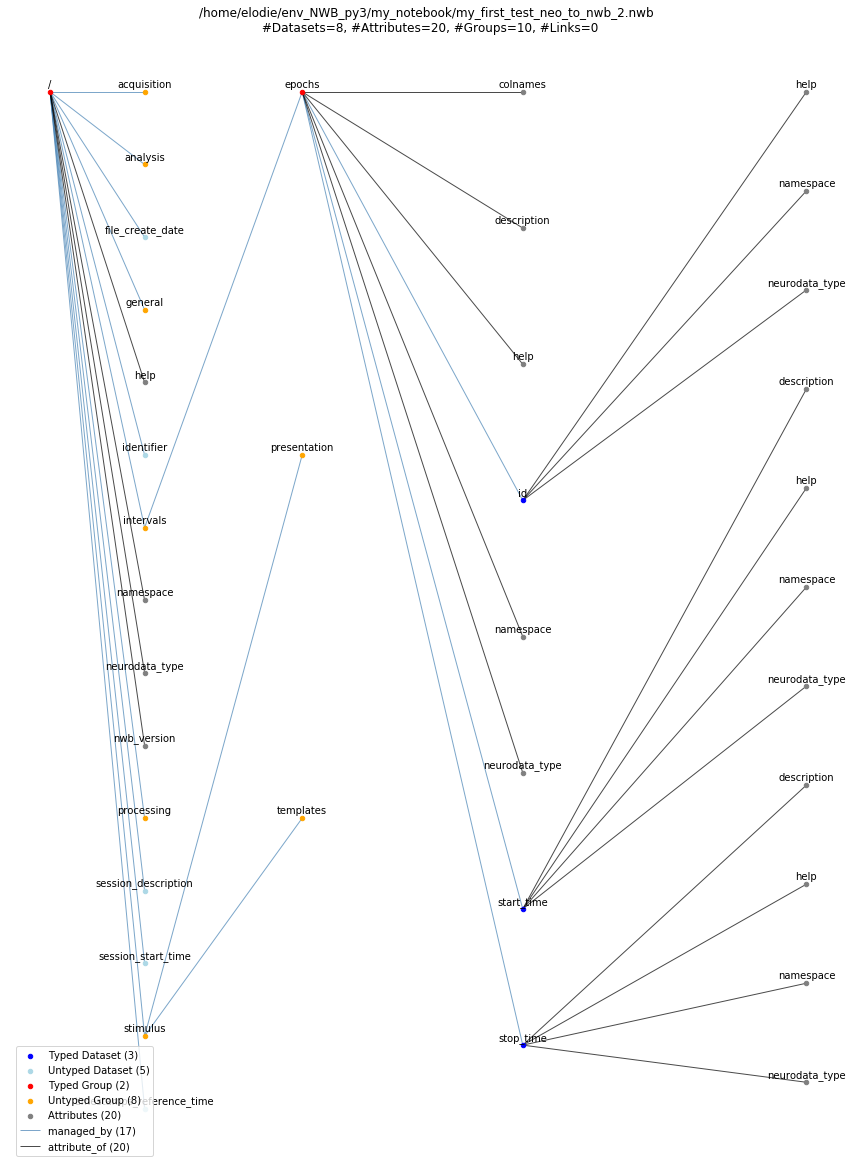

In [18]:
# Plotting settings
show_bar_plot = False    # Change setting to plot distribution of object sizes in the HDF5 file
plot_single_file = True # Plot all files or a single example file
output_filenames_neo = filename_neo
print("output_filenames_neo = ", output_filenames_neo)
    
# Select the files to plot
filenames_neo = output_filenames_neo
print("filenames_neo = ", filenames_neo)

from utils.render import HierarchyDescription, NXGraphHierarchyDescription
import matplotlib.pyplot as plt
        
# Create the plots for all files
file_hierarchy = HierarchyDescription.from_hdf5(filenames_neo)
file_graph = NXGraphHierarchyDescription(file_hierarchy)          
fig = file_graph.draw(show_plot=False,
                      figsize=(12,16),
                      label_offset=(0.0, 0.0065),
                      label_font_size=10)
plot_title = filenames_neo + " \n " + "#Datasets=%i, #Attributes=%i, #Groups=%i, #Links=%i" % (len(file_hierarchy['datasets']), len(file_hierarchy['attributes']), len(file_hierarchy['groups']), len(file_hierarchy['links']))
plt.title(plot_title)
plt.show()
        
# Show a sorted bar plot with the sizes of all datasets in the file
if show_bar_plot:
    d = {i['name']: np.prod(i['size']) for i in file_hierarchy['datasets']}
    l = [w for w in sorted(d, key=d.get, reverse=True)]
    s = [d[w] for w in l]   
    p = np.arange(len(l))   
    fig,ax = plt.subplots(figsize=(16,7))
    ax.set_title(filename)
    ax.bar(p, s, width=1, color='r')
    ax.set_xticks(p+1)  
    ax.set_xticklabels(l)  
    ax.set_yscale("log", nonposy='clip')
    fig.autofmt_xdate(bottom=0.2, rotation=90, ha='right')
    plt.show()
plt.show()